# PRE-PROCESSING THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Set plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# Load and Clean Data
df = pd.read_csv("Superstore.csv", encoding='latin-1')

In [4]:
#showcasing first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#Fetching number of rows and column
print ("Number of rows:" , df.shape[0])
print ("Number of columns:" , df.shape[1])

Number of rows: 9994
Number of columns: 21


In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
# Drop irrelevant columns
df.drop(columns=['Row ID', 'Postal Code'], inplace=True)


In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [12]:
#dropping null values
df.dropna()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [13]:
# Null values
print("Null values:\n", df.isnull().sum())

Null values:
 Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [14]:
#Custom statistics
print("\nCustom Stats:")
print("Total Sales:", np.sum(df['Sales']))
print("Average Discount:", np.mean(df['Discount']))
print("Max Profit:", np.max(df['Profit']))
print("Unique Categories:", df['Category'].nunique())



Custom Stats:
Total Sales: 2296919.4883000003
Average Discount: 0.1561883318322826
Max Profit: 8399.976
Unique Categories: 3


In [15]:
#Grouped Aggregations (using groupby)
category_summary = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\n Category-wise Sales and Profit Summary:\n", category_summary)





 Category-wise Sales and Profit Summary:
                                     Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        328167.7310  26602.2251
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203412.7330  30221.7633
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054
Furniture       Furnishings    91705.1640  13059.1436
Office Supplies Paper          78479.2060  34053.5693
                Supplies       46673.5380  -1189.0995
                Art            27118.7920   6527.7870
                Envelopes      16476.4020   6964.1767
                Labels         12486.31

In [16]:
#Creating 3 new columns for better analysis

df['Order Month']= df['Order Date'].dt.month
df['Order Year']= df['Order Date'].dt.year
df['Order Dayofweek']= df['Order Date'].dt.dayofweek


In [17]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Dayofweek
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# Univariate Analysis (1 Variable)
### Helps understand individual metric distributions, trends, and concentration of values.

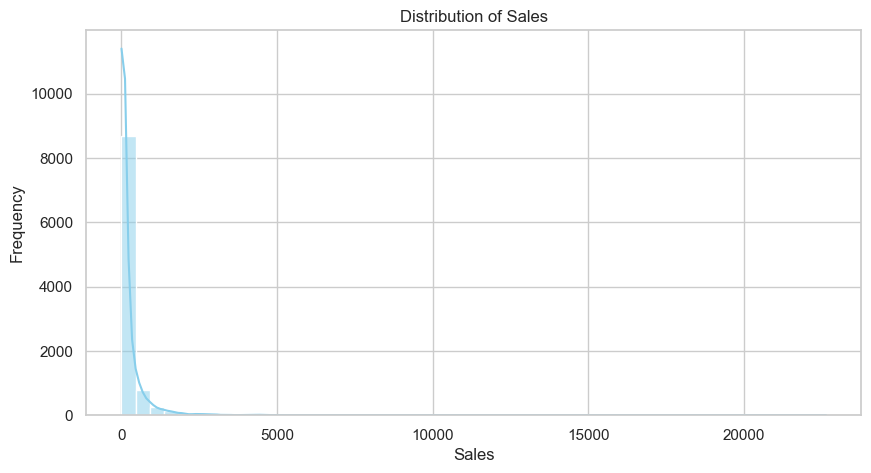

In [18]:
sns.histplot(df['Sales'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


# Insight: Sales are right-skewed, indicating that most transactions are of smaller amounts.

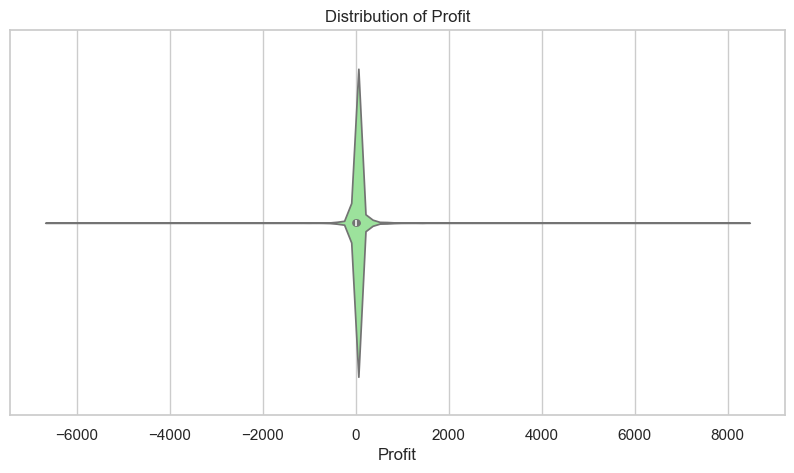

In [19]:
# 2. Profit Distribution
sns.violinplot(x=df['Profit'], color='lightgreen')
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.show()


# Insight: Presence of negative values indicates losses in some transactions.

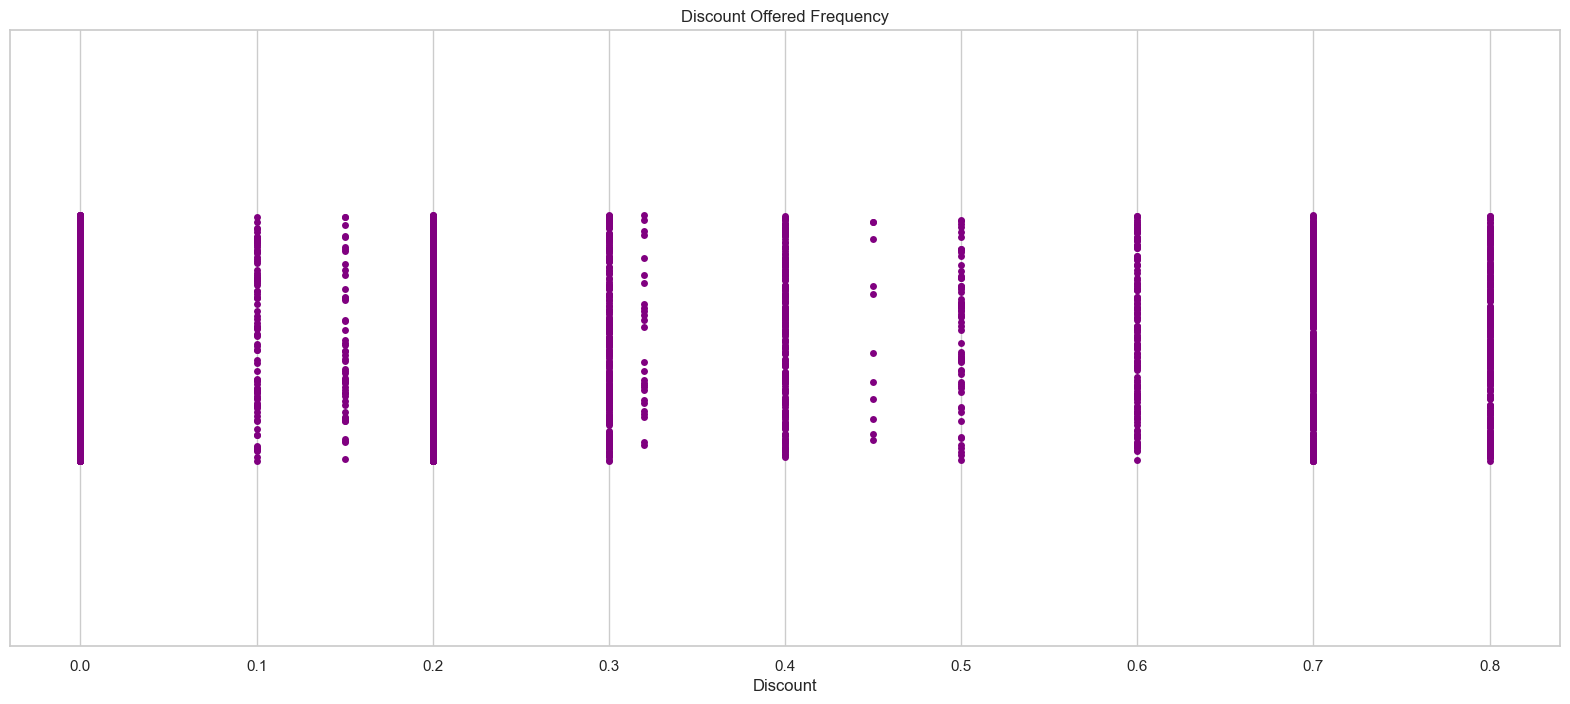

In [57]:
# 3. Discount Distribution
sns.stripplot(x='Discount', data=df, color='purple', jitter=0.2)
plt.title("Discount Offered Frequency")
plt.xlabel("Discount")
plt.show()


# Insight: Most frequent discounts are 0%, 20%, and 30%, revealing promotional patterns.

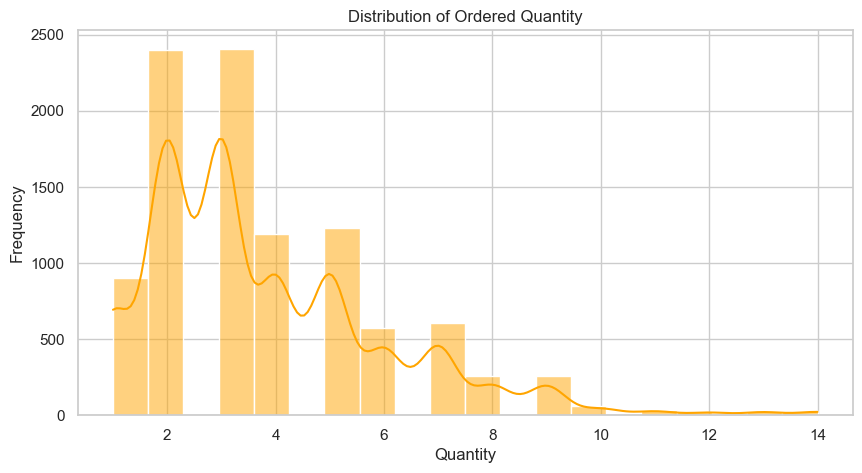

In [21]:
# 4. Quantity Ordered
sns.histplot(df['Quantity'], bins=20, color='orange', kde=True)
plt.title("Distribution of Ordered Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


# Insight: Majority of orders consist of small quantities (1–5 units).

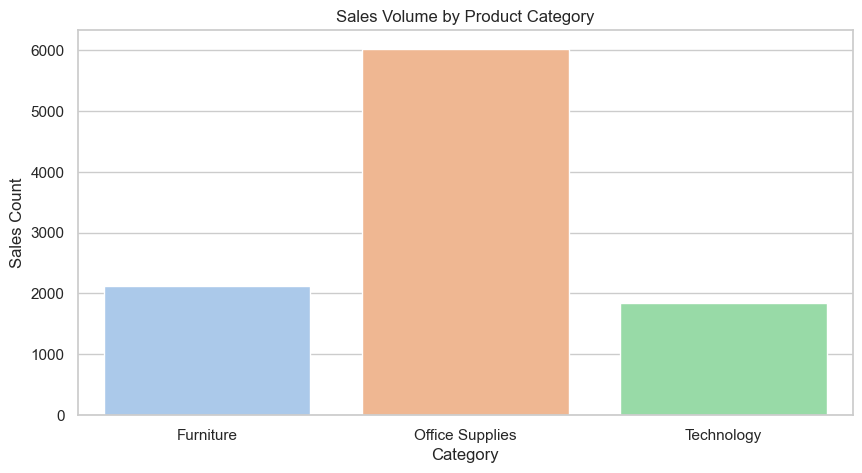

In [22]:
# 5. Category Count
sns.countplot(x='Category', data=df, palette='pastel',hue='Category')
plt.title("Sales Volume by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales Count")
plt.show()


# Insight: Office Supplies are sold the most, followed by Furniture and Technology.

C:\Users\devansh\AppData\Local\Temp\ipykernel_13704\2401603165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Ship Mode'].value_counts().index, y=df['Ship Mode'].value_counts().values, palette='cool',legend= False)


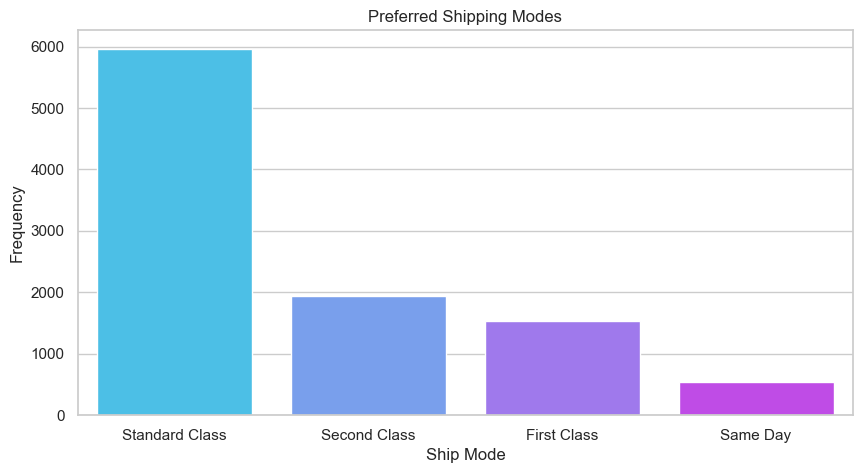

In [23]:
# 6. Ship Mode Frequency
sns.barplot(x=df['Ship Mode'].value_counts().index, y=df['Ship Mode'].value_counts().values, palette='cool',legend= False)
plt.title("Preferred Shipping Modes")
plt.xlabel("Ship Mode")
plt.ylabel("Frequency")
plt.show()

# Not usinh any Hue as it is Univariate analysis 
# Insight: Standard Class is the most used shipping method, which may suggest cost preference over speed.

C:\Users\devansh\AppData\Local\Temp\ipykernel_13704\1532324175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2',legend= False)


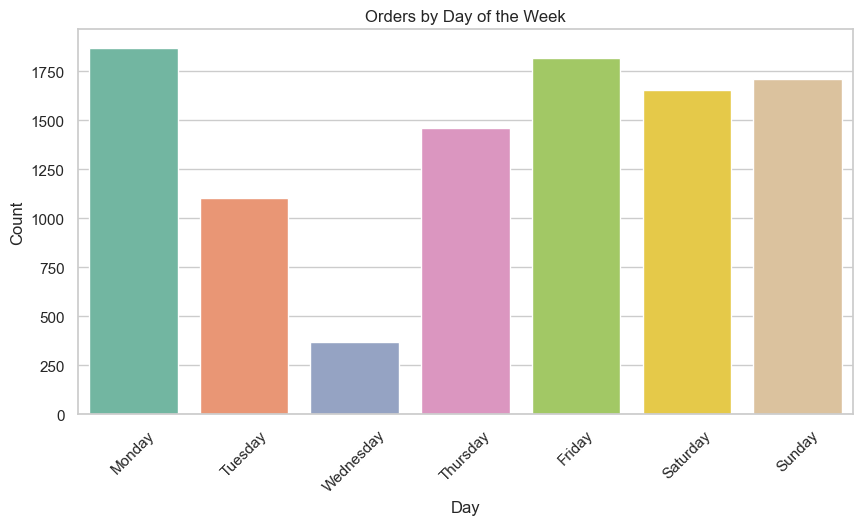

In [24]:
# 7. Order Volume by Day of Week
df['Order Day'] = df['Order Date'].dt.day_name()
sns.countplot(x='Order Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2',legend= False)
plt.title("Orders by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Cannot use Hue as it is Univariate Analysis
# Insight: Most orders occur mid-week, potentially reflecting work-related purchases.

C:\Users\devansh\AppData\Local\Temp\ipykernel_13704\4207111149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='magma')


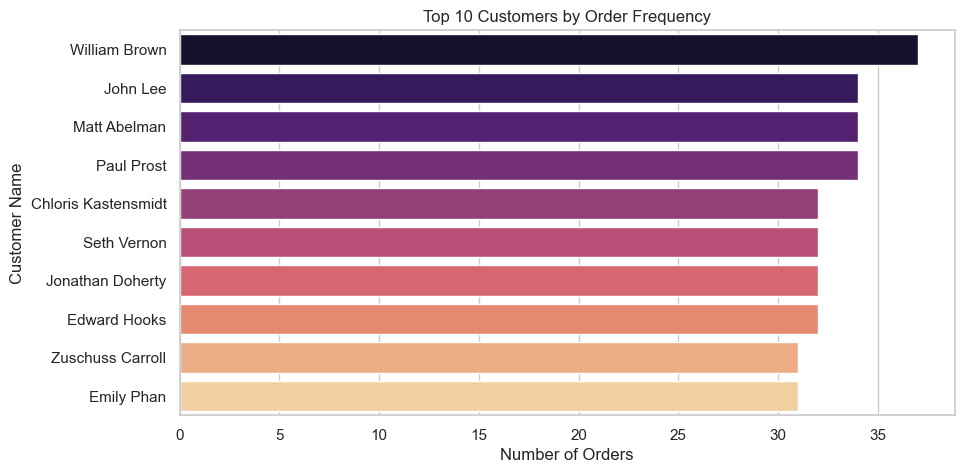

In [25]:
top_customers = df['Customer Name'].value_counts().head(10)
sns.barplot(x=top_customers.values, y=top_customers.index, palette='magma')
plt.title("Top 10 Customers by Order Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("Customer Name")
plt.show()

# Insight: These customers are the most frequent buyers; they can be targeted for loyalty programs or premium offers.


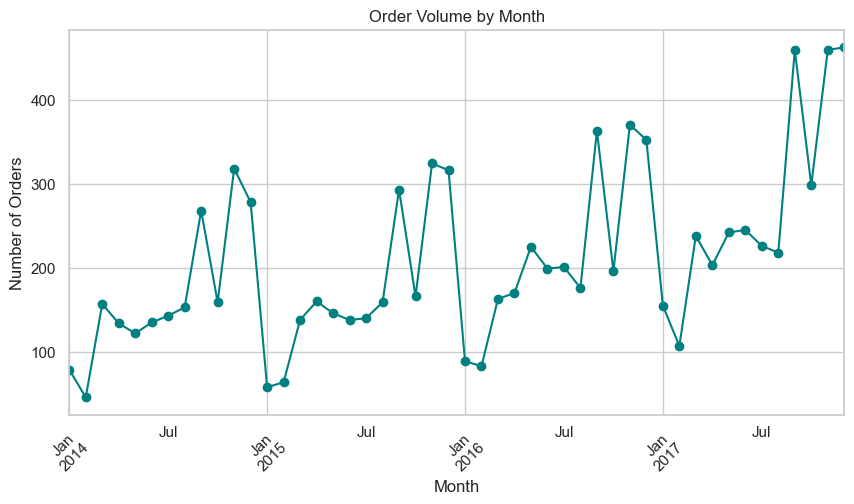

In [26]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_orders = df['Order Month'].value_counts().sort_index()
monthly_orders.plot(kind='line', marker='o', color='teal')
plt.title("Order Volume by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Insight: Seasonality is visible; understanding high and low months can improve inventory and marketing strategies

# Bivariate Analysis (2 Variables)
### Helps identify relationships, trends, or contrasts between pairs of variables.

In [27]:
#Monthly Sales Analysis

sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

In [28]:
sales_by_month

,Order Month,Sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28013.9730
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


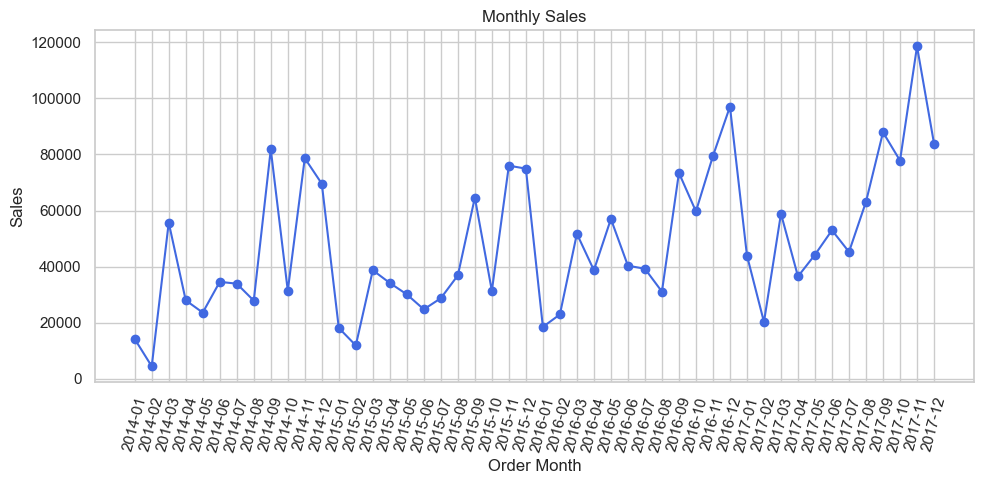

In [29]:
#MONTHLY SALES ANALYSIS

plt.plot(sales_by_month['Order Month'].astype(str), sales_by_month['Sales'], marker='o', color='royalblue')
plt.title("Monthly Sales")
plt.xlabel("Order Month")
plt.ylabel("Sales")
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()


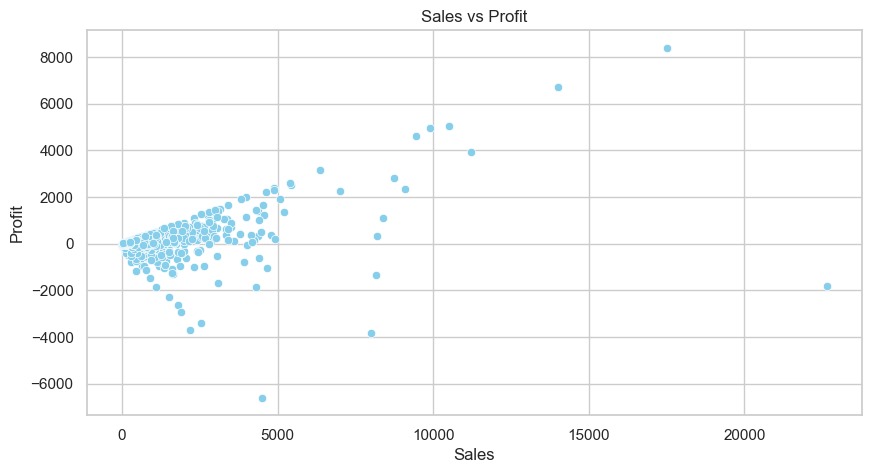

In [30]:
# SALES VS PROFIT
sns.scatterplot(x='Sales', y='Profit', data=df, color='skyblue')
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


#Insight:Visualizes the relationship between sales and profit.While there's a positive trend, some sales result in losses, especially in specific categories.

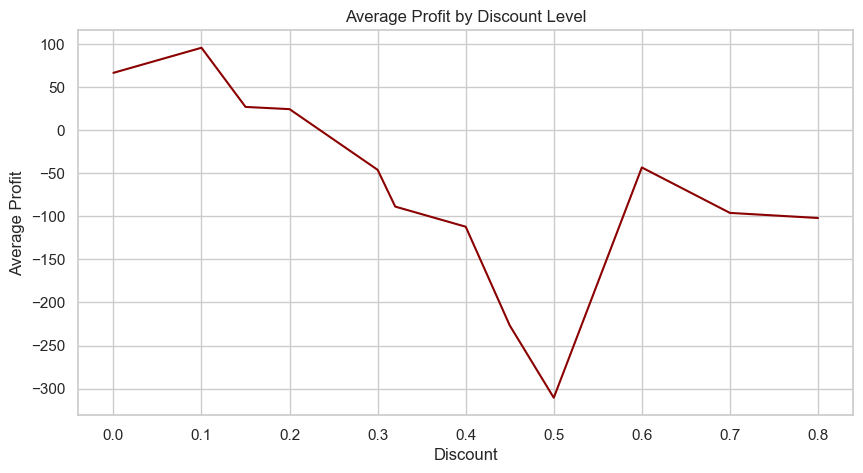

In [31]:
# DISCOUNT VS PROFIT
sns.lineplot(data=df, x='Discount', y='Profit', estimator='mean',errorbar=None, color='darkred')
plt.title("Average Profit by Discount Level")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.show()

#Insight: Increasing discounts generally reduce average profits. Important for defining discount thresholds.

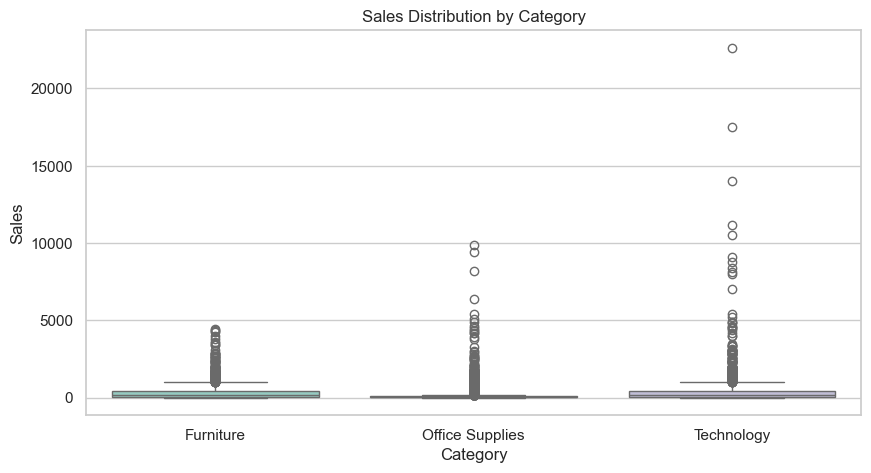

In [32]:
#CATEGORY VS SALES
sns.boxplot(data=df, x='Category', y='Sales', palette='Set3',hue = 'Category', legend = False)
plt.title("Sales Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

#Insight: Technology category exhibits higher average sales. Furniture show more frequent lower-value orders.

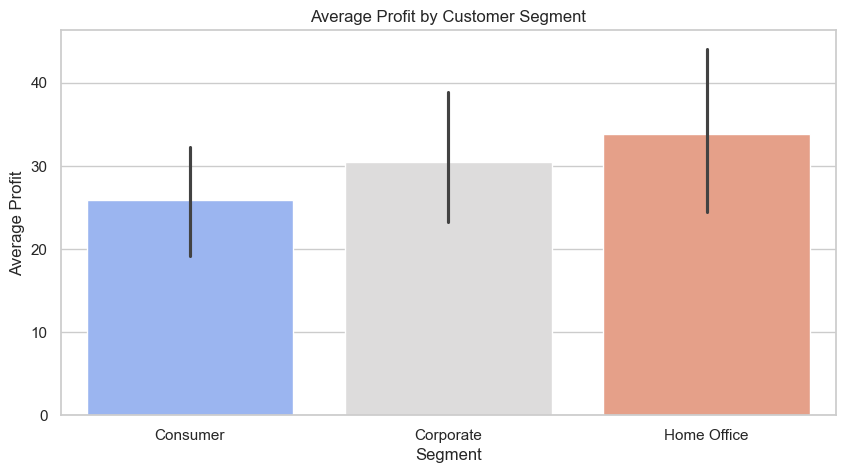

In [33]:
# SEGMENT VS PROFIT
sns.barplot(data=df, x='Segment', y='Profit', palette='coolwarm', hue = 'Segment', estimator=np.mean)
plt.title("Average Profit by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Average Profit")
plt.show()

# Insight: Home Office and Corporate segments contribute more to average profit compared to the Consumer segment.

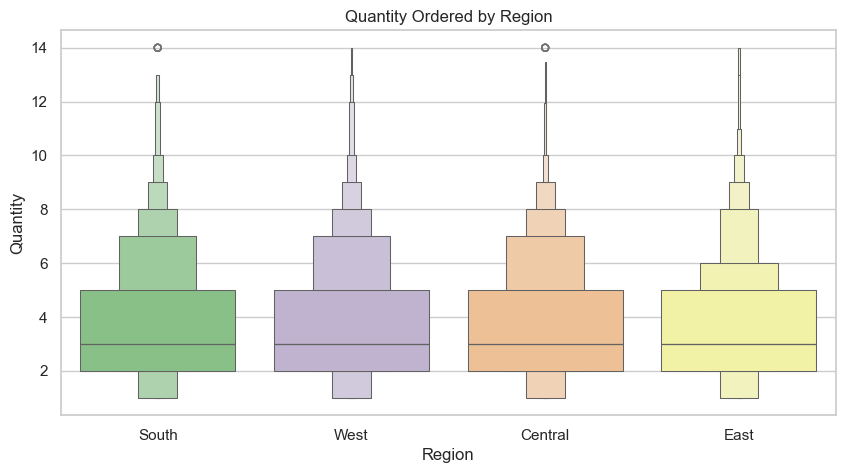

In [34]:
# REGION VS QUANTITY

sns.boxenplot(data=df, x='Region', y='Quantity', palette='Accent',hue = 'Region')
plt.title("Quantity Ordered by Region")
plt.xlabel("Region")
plt.ylabel("Quantity")
plt.show()

# Insight: Reveals that certain regions (like Central and East) place more bulk orders. This supports inventory and shipping decisions.

# Multivariate Analysis (3+ Variables)
### Provides rich insights involving combined factors affecting business outcomes

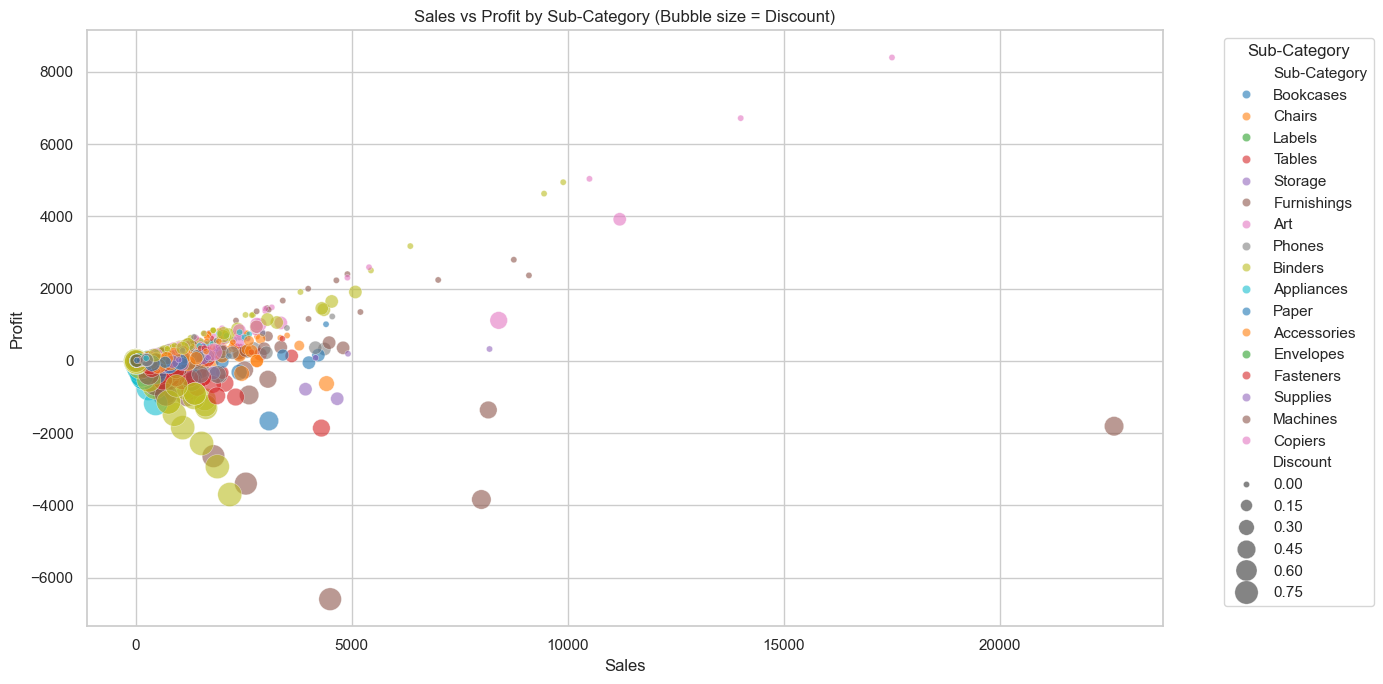

In [36]:
# SALES,PROFIT,DISCOUNT BY SUB CATEGORY

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Sales', y='Profit', size='Discount', hue='Sub-Category', sizes=(20, 300), alpha=0.6, palette='tab10')
plt.title("Sales vs Profit by Sub-Category (Bubble size = Discount)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Sub-Category')
plt.grid(True)
plt.tight_layout()
plt.show()


#Insights:
#1.Sub-categories with high sales but negative profit margins (e.g., Tables, Binders) may be over-discounted.
#2.Bubble size shows how discounts affect profitability — helps identify over-promotions.

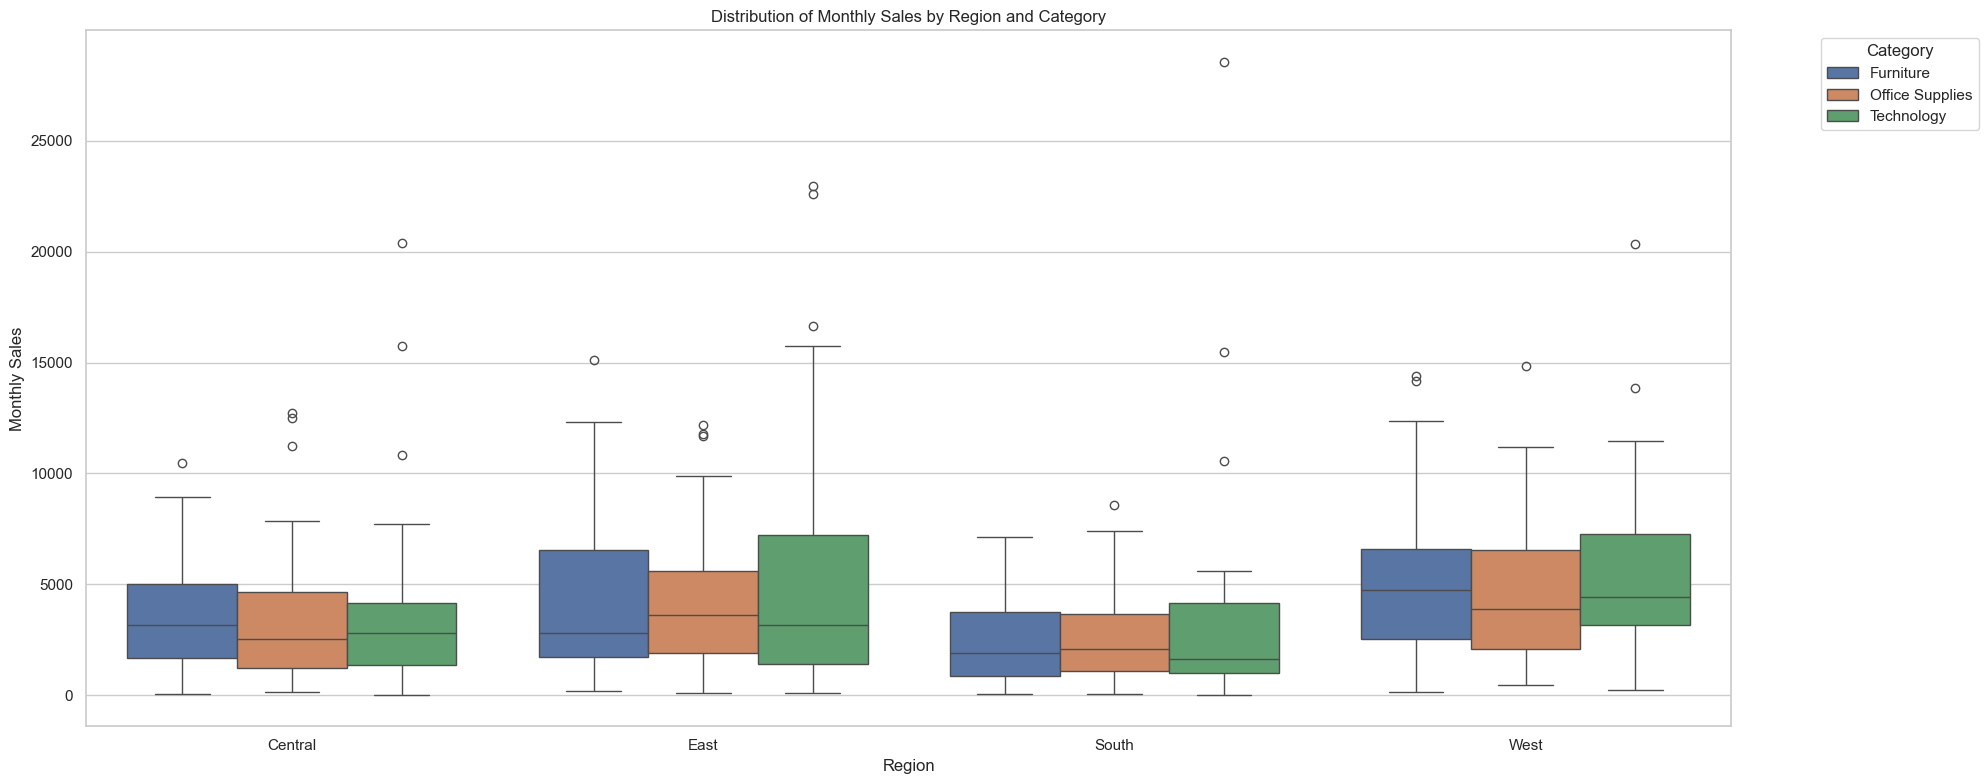

'INSIGHTS:\nTechnology leads sales across all regions.\n\nWest region consistently performs best.\n\nSales peak in Q4, showing strong seasonality.\n\nSouth lags, especially in Furniture sales.'

In [55]:
# CATEGORY WISE MONTHLY SALES TREND BY REGION

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month' column
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Group monthly sales by Region and Category
monthly_sales = df.groupby(['Month', 'Category', 'Region'])['Sales'].sum().reset_index()

# Plot box plot
plt.figure(figsize=(20, 8))
sns.boxplot(data=monthly_sales, x='Region', y='Sales', hue='Category')

plt.title('Distribution of Monthly Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Monthly Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


'''INSIGHTS:
Technology leads sales across all regions.

West region consistently performs best.

Sales peak in Q4, showing strong seasonality.

South lags, especially in Furniture sales.'''

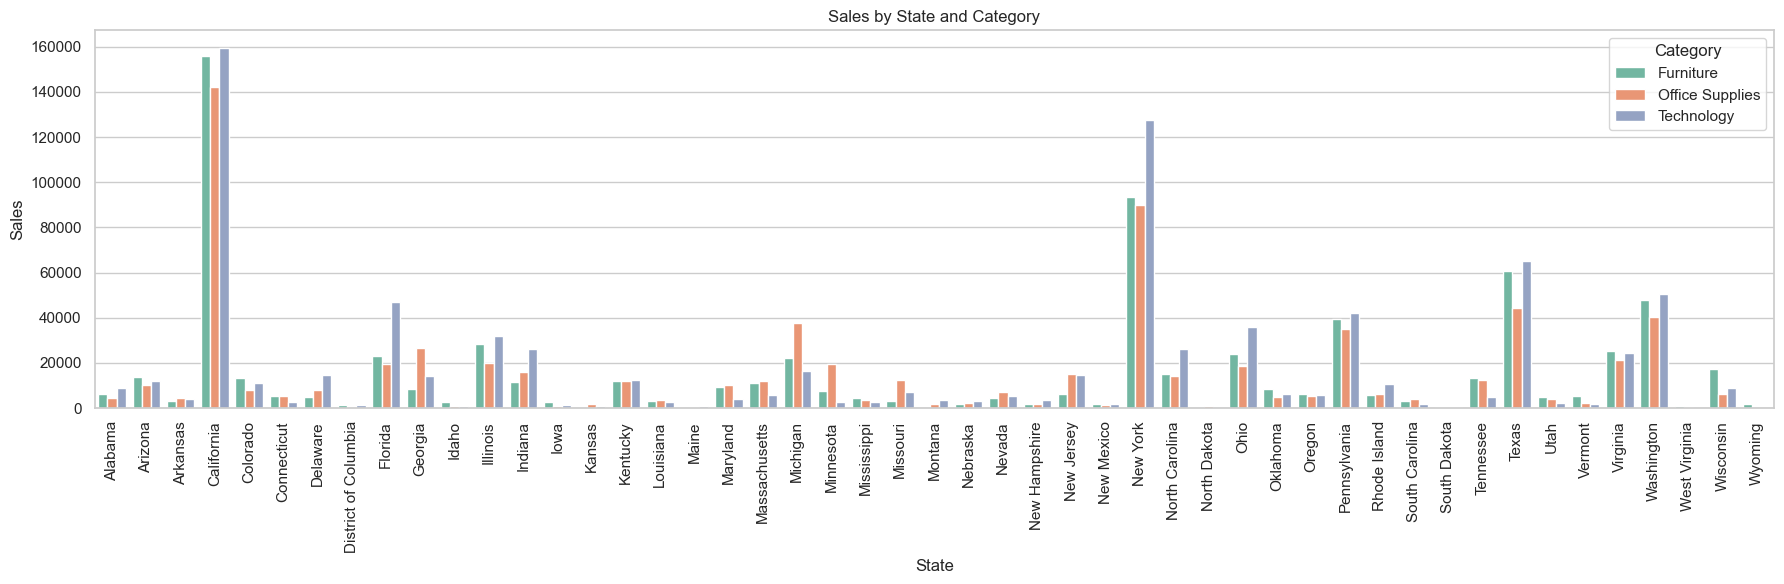

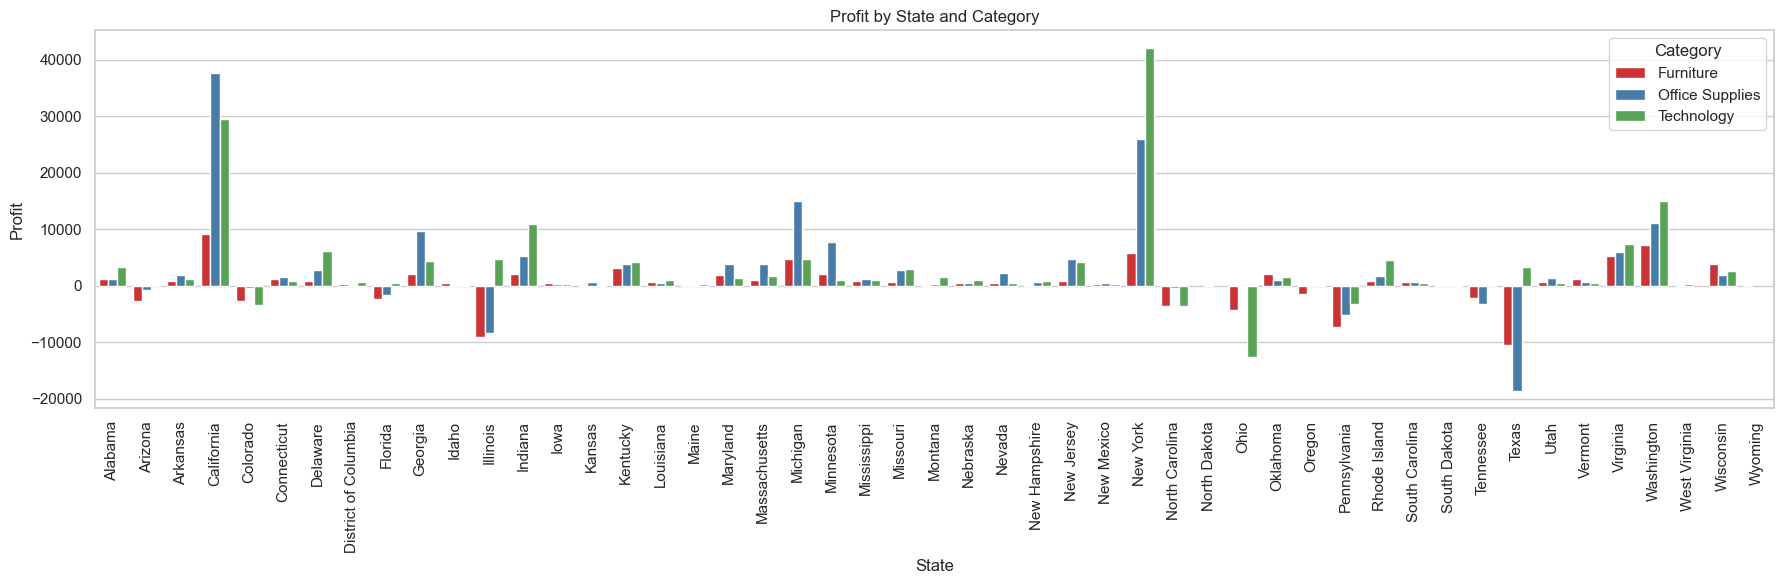

' INSIGHTS:\nSales Insight:\nSales are highest in California, New York, and Texas across all categories, with Technology leading in most high-performing states.\n\nProfit Insight:\nDespite high sales, some states like Texas and Illinois show lower or negative profits in certain categories, especially Furniture. \nThis indicates that high sales do not always translate to profitability and highlights the need for cost and discount control in\nunderperforming categories'

In [52]:
# SALES AND PROFIT BY STATE AND CATEGORY

# Group data
grouped = df.groupby(['State', 'Category'])[['Sales', 'Profit']].sum().reset_index()

# Plot function
def plot_metric_by_state(metric, palette):
    plt.figure(figsize=(18, 6))
    sns.barplot(data=grouped, x='State', y=metric, hue='Category', palette=palette)
    plt.title(f'{metric} by State and Category')
    plt.xlabel('State')
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.legend(title='Category')
    plt.tight_layout()
    plt.show()

# Plot both metrics
plot_metric_by_state('Sales', 'Set2')
plot_metric_by_state('Profit', 'Set1')

''' INSIGHTS:
Sales Insight:
Sales are highest in California, New York, and Texas across all categories, with Technology leading in most high-performing states.

Profit Insight:
Despite high sales, some states like Texas and Illinois show lower or negative profits in certain categories, especially Furniture. 
This indicates that high sales do not always translate to profitability and highlights the need for cost and discount control in
underperforming categories'''

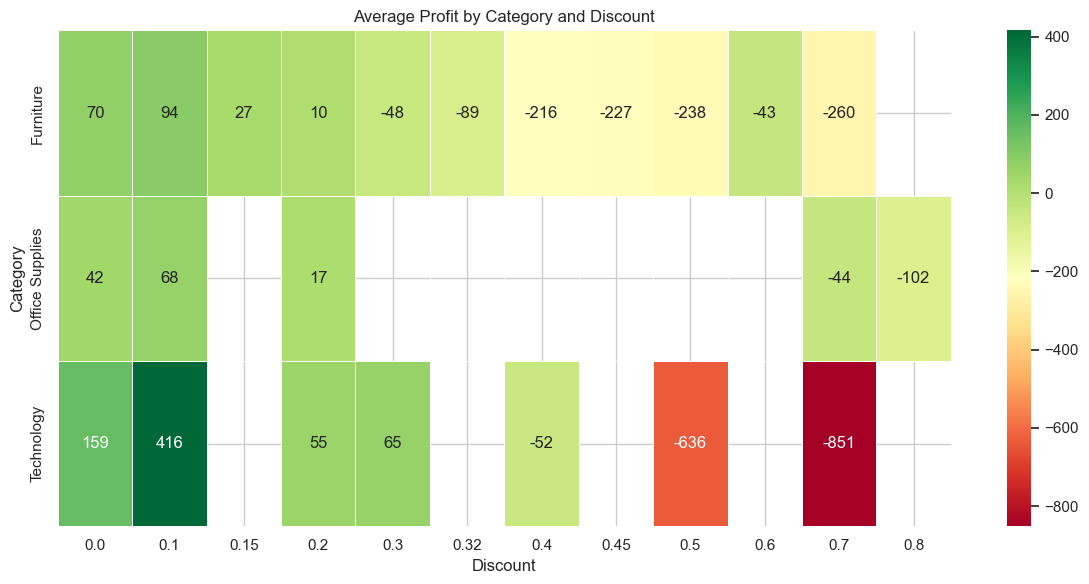

In [40]:
#AVERAGE PROFIT BY CATEGORY AND DISCOUNT RATE

pivot_table = df.pivot_table(values='Profit', index='Category', columns='Discount', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='RdYlGn', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Average Profit by Category and Discount")
plt.xlabel("Discount")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

#INSIGHTS:
#A clear trend shows that higher discounts generally lead to lower profits, especially in the Technology and Office Supplies categories. 
#The Furniture category appears particularly sensitive to discounting, with profits dropping significantly as discounts increase. 
#This suggests a need for more strategic discounting in categories where profit margins are heavily impacted.

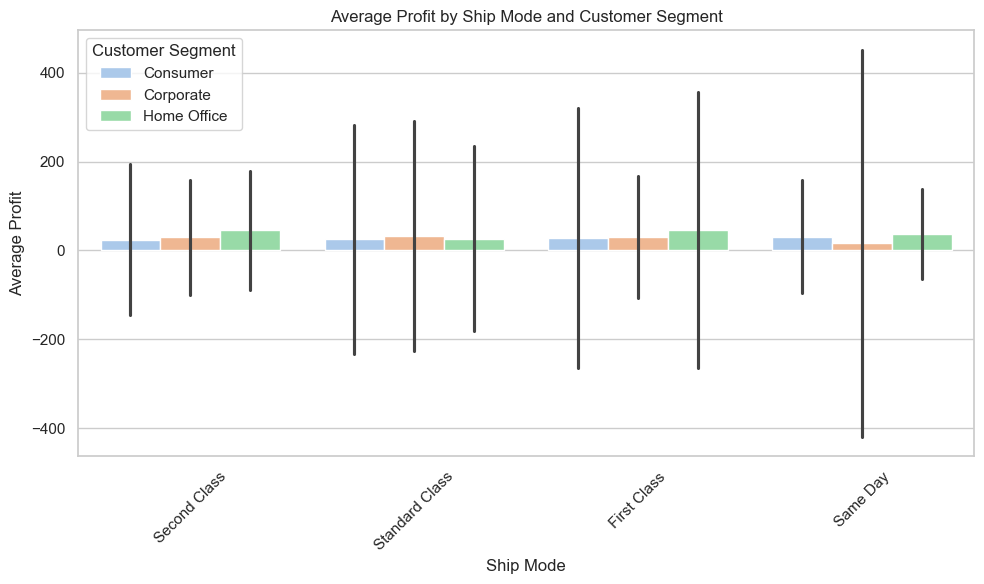

In [51]:
# AVERAGE PROFIT BY SHIP MODE AND CUSTOMER SEGMENT

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ship Mode', y='Profit', hue='Segment', estimator=np.mean, errorbar ='sd', palette='pastel')

plt.title('Average Profit by Ship Mode and Customer Segment')
plt.xlabel('Ship Mode')
plt.ylabel('Average Profit')
plt.legend(title='Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#INSIGHTS:
#Standard Class is the most used shipping mode, but only Corporate and Home Office segments generate good profits from it. 
#Same Day and First Class shipping are less common but more profitable for Corporate customers.
#Second Class yields the lowest profits across all segments and may need re-evaluation.